# Plotting Using seaborn and matplotlib

matplotlib is the standard graphing module, while seaborn is a high-level interface to matplotlib that simplifies commands. For more on seaborn, see [here](https://elitedatascience.com/python-seaborn-tutorial), [here](https://seaborn.pydata.org/introduction.html), and [here](https://seaborn.pydata.org/tutorial.html).

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

## Histograms

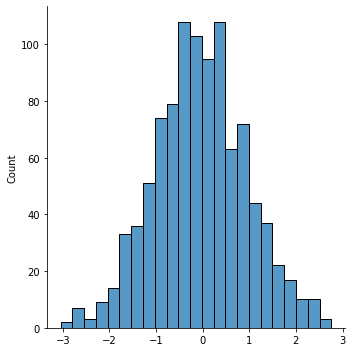

In [17]:
draws = np.random.normal(size=1000) # simulate data
sns.displot(draws); # the semicolon suppresses some unnecessary output
plt.show() # make the plot display

## Scatterplots

We can use the regplot command to create a scatterplot.

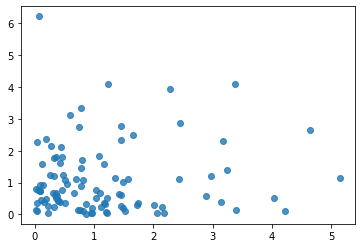

In [18]:
# simulate data
X = np.random.exponential(size=100)
Y = np.random.exponential(size=100)

# scatterplot of Y versus X with points colored according to Z
sns.regplot(x=X, y=Y, fit_reg=False);
plt.show()

Now let's suppose we have an additional variable Z that marks whether an observation is treated or untreated (1 or 0). To color the observations by their Z value, we use the `lmplot` command. Unlike `regplot()`, this requires the additional step of formatting the data as a DataFrame.

In [19]:
# simulate Z
Z = np.random.binomial(1,0.5,100)

import pandas as pd # DataFrame module

# create DataFrame consisting of 3 columns containing the Y, X, and Z arrays
data = pd.DataFrame(np.vstack([Y,X,Z]).T, columns=['Y','X','Z'])
  # np.vstack stacks the horizontal arrays vertically
  # then we flip them vertically by transposing using .T

data.head() # print first five rows of the dataframe

,Y,X,Z
0,0.300565,1.725432,1.0
1,0.061958,1.205736,0.0
2,0.235546,2.146245,1.0
3,0.141916,3.398454,1.0
4,0.214724,1.490534,0.0


Side note: It might seem kind of annoying to have the additional step of creating a DataFrame with column labels, but often in practice you'll have your dataset stored in the convenient DataFrame format already because you'll read CSV files in using panda's `read_csv()` command. Also it makes the next step of plotting with seaborn easy:

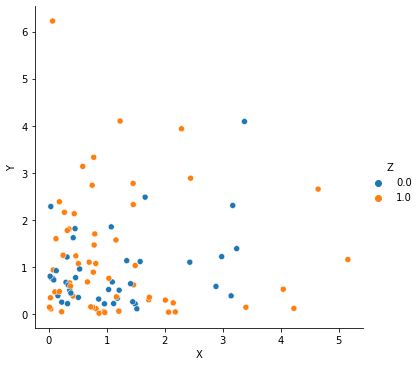

In [20]:
# scatterplot of Y versus X with points colored according to Z
sns.relplot(x='X', y='Y', data=data, hue='Z');
plt.show()

We can set custom limits for the axes as follows:

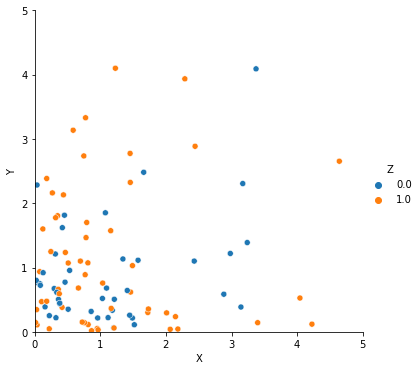

In [21]:
sns.relplot(x='X', y='Y', data=data, hue='Z');
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.show()

At this point it's getting annoying to have to keeping typing `plt.show()`, so we'll use a 'magic function' specific to Jupyter notebooks to avoid doing this.

In [22]:
%matplotlib inline 

Finally, to add automatically generated regression lines with CIs, use lmplot instead of relplot.

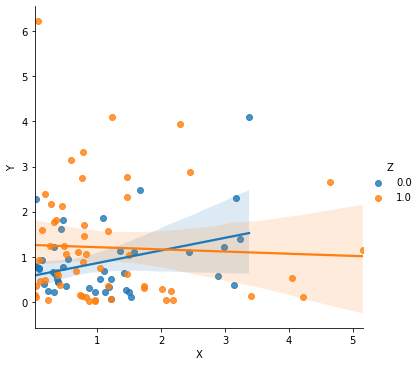

In [23]:
sns.lmplot(x='X', y='Y', data=data, hue='Z');

However, if you want to plot a customized curve overlaying the scatterplot, use a different method discussed in the exercise below.

## Graphing

Let's plot a sin curve using matplotlib's plot function. (This can also be done in seaborn with `relplot` using the option `kind='line'`, but this requires the extra annoying step of making a DataFrame that we don't need right now.)

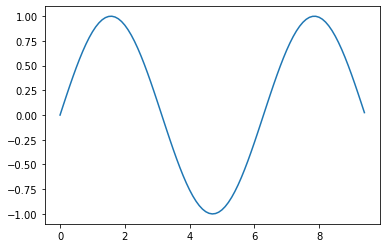

In [24]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1) # grid of points from 0 to 3*pi
y = np.sin(x)

plt.plot(x, y) # matplotlib command for curve plotting

Note: this still has seaborn's nice style. Whenever you want to plot using matplotlib but use seaborn's style, all you have to do is import seaborn.

Next, let's plot a sin and cosine curve on the same graph and add some axes labels and a legend.

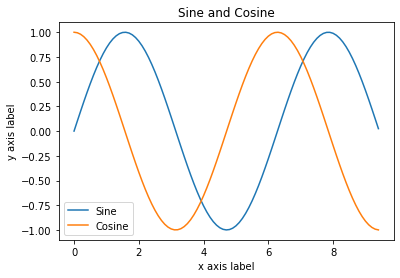

In [25]:
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine']);

## Exercise

We'll create a scatterplot and overlay a custom linear regression line rather than using lmplot to do it all.

In [26]:
# simulate linear regression model
n = 100
X = np.vstack([np.ones(n), np.random.normal(size=n)]).T
eps = np.random.normal(size=n)
beta = np.array([1, 0.5])
Y = X.dot(beta) + eps

Create a vector betahat containing the linear regression estimates of Y on X.

Plot a scatterplot of Y versus the second column of X using plt.scatter(). Overlay a regression line using subplots. Restrict the X axis to (-3,3). Add some axes labels and a title.

## Multiplots

To display two plots adjacent to one another, we use `subplot`.

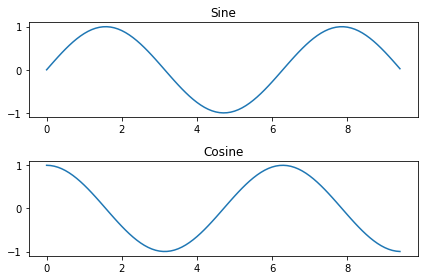

In [27]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1
# The last argument sets the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Nice layout. See what happens if you omit this.
plt.tight_layout()

To save a figure after plotting, use the following command:

    plt.savefig('fig1.png',bbox\_inches='tight')

You can also save as pdf and other formats.